In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
df1 = pd.read_csv("../input/2019-autonomous-vehicle-disengagement-reports/2018-19_AutonomousVehicleDisengagementReports(firsttimefilers).csv")
df2 = pd.read_csv("../input/2019-autonomous-vehicle-disengagement-reports/2019AutonomousVehicleDisengagementReports.csv")

#Combining Both DataFrames
res = [df1, df2] 
df = pd.concat(res)

#Renaming Columns for Legibility 
df.columns = ['Manufacturer', 'Permit Number', 'Date', 'VIN number','Vehicle Is Capable Of Operating Without A Driver','Driver Present','Disengagement Initiated By','Disengagement Location', 'Description Of Facts Causing Disengagement', 'N/A','N/A'] 
df.head(20)

#Cleaning up dataframe to get rid of string issues such as "Test Driver" vs "test driver", etc. 
df["Disengagement Location"] = df["Disengagement Location"].replace("street (high speed)", "street")
df["Disengagement Location"] = df["Disengagement Location"].replace("Downtown street", "street") 
df["Disengagement Location"] = df["Disengagement Location"].replace("Rural", "rural road") 
df["Disengagement Location"] = df["Disengagement Location"].replace("Parking Lot", "parking facility") 
df["Disengagement Location"] = df["Disengagement Location"].str.lower()
df["Disengagement Location"] = df["Disengagement Location"].replace("downtown street", "street") 

df["Driver Present"] = df["Driver Present"].str.lower()
df["Driver Present"] = df["Driver Present"].replace("nan", "no")

df["Vehicle Is Capable Of Operating Without A Driver"] = df["Vehicle Is Capable Of Operating Without A Driver"].str.lower()

df["Disengagement Initiated By"] = df["Disengagement Initiated By"].replace("Safety Driver", "test driver")
df["Disengagement Initiated By"] = df["Disengagement Initiated By"].replace("Vehicle Operator", "test driver") 
df["Disengagement Initiated By"] = df["Disengagement Initiated By"].str.lower()

df["Date"] = df["Date"].replace("1/30.2019", "1/30/2019")
df["Date"] = pd.to_datetime(df["Date"]) 
df = df.set_index("Date")

df["Description Of Facts Causing Disengagement"] = df["Description Of Facts Causing Disengagement"].astype(str)
df.head(20)




,Manufacturer,Permit Number,VIN number,Vehicle Is Capable Of Operating Without A Driver,Driver Present,Disengagement Initiated By,Disengagement Location,Description Of Facts Causing Disengagement,N/A,N/A
Date,,,,,,,,,,
2018-03-14,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
2018-03-14,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the radar based percept...,NaN,NaN
2018-03-14,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
2018-03-14,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
2018-03-15,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
2018-03-15,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the radar based percept...,NaN,NaN
2018-03-16,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
2018-03-16,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
2018-03-16,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN


Count Statistics

In [2]:
#Number of each stats: 

print("Number of reports: " + str(df.shape[0]))
print("Number of unique manufacturers: " + str(df["Manufacturer"].nunique()))
print("Number of unique vehicles: " + str(df["VIN number"].nunique()))
print("Number of unique permits: " + str(df["Permit Number"].nunique()))


Number of reports: 9339
Number of unique manufacturers: 36
Number of unique vehicles: 304
Number of unique permits: 35


Disengagement Frequency Over Time 

Date
2018-02-21    1
2018-02-23    1
2018-02-28    1
2018-03-06    1
2018-03-12    1
             ..
2019-11-28    1
2019-11-30    1
2019-12-01    1
2019-12-04    1
2019-12-14    1
Name: VIN number, Length: 3341, dtype: int64


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

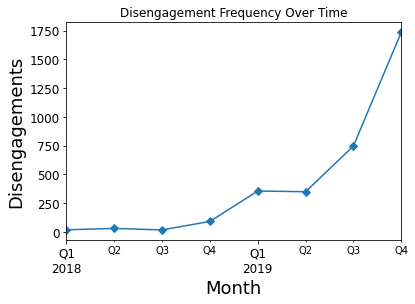

In [3]:
dates = df.groupby('Date')["VIN number"].nunique()
print(dates)
plt.title("Disengagement Frequency Over Time")
dates['2018-01-01':'2019-12-31'].resample('Q').count().plot(marker='D')
plt.xlabel("Month", fontsize=18)
plt.ylabel("Disengagements", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Put markers in

Disengagement Initiated By 

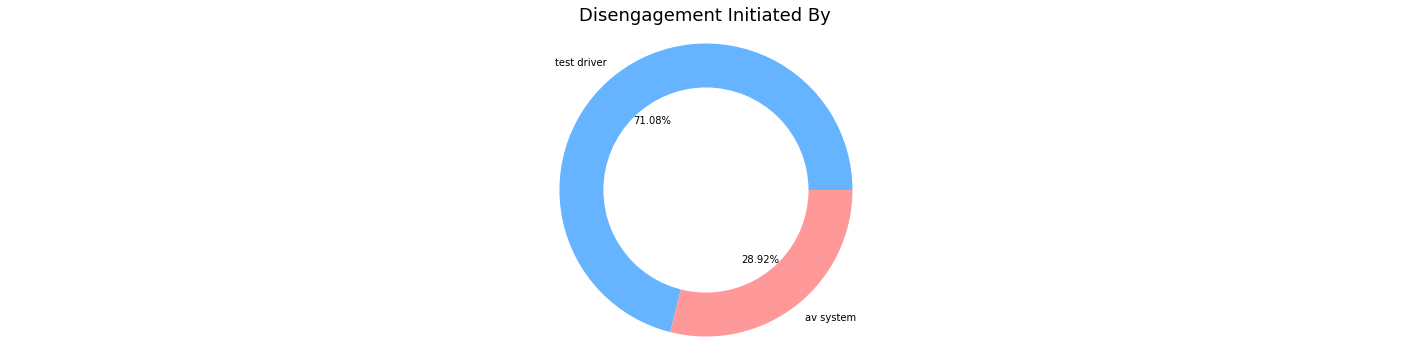

In [4]:
#Disengagement Initiated By 
catinitiate = df['Disengagement Initiated By'].unique().tolist()
catinitiate.pop()
plt.figure(figsize=(25,6))
plt.title('Disengagement Initiated By', fontsize = 18)
vcountinitiate = df['Disengagement Initiated By'].value_counts().tolist()
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
plt.pie(vcountinitiate, labels= catinitiate, autopct = '%0.2f%%', colors= colors)
plt.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()




Disengagement Location 

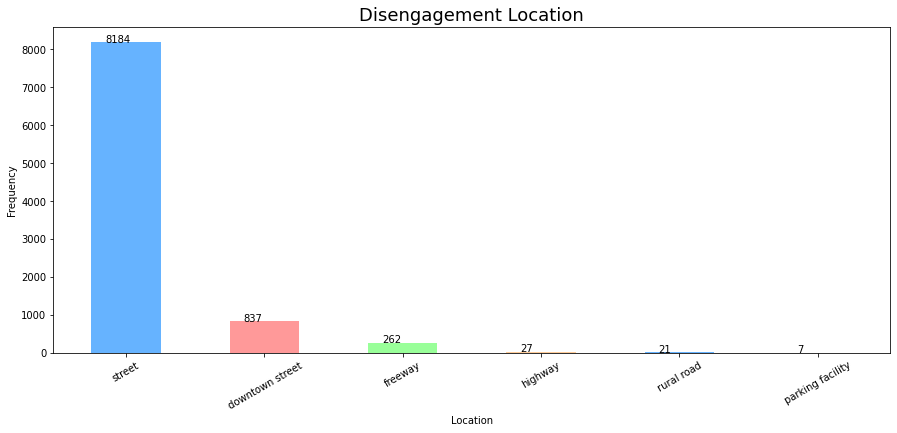

In [5]:
#Disengagement Location (bar graph instead of pie as more legible)
catlocation = df['Disengagement Location'].unique().tolist()
catlocation.pop(-1)
colors1 = ['#ffcc99', '#99ff99','#66b3ff', '#ff9999',]
catloc = range(len(catlocation))
plt.figure(figsize=(15,6))
plt.title('Disengagement Location', fontsize = 18)
plt.xlabel("Location")
plt.ylabel("Frequency")
vcountlocation = df['Disengagement Location'].value_counts().tolist()
plt.bar(catloc, vcountlocation,width = 0.5, color = colors)
ax = plt.subplot()
ax.set_xticks(catloc)
ax.set_xticklabels(catlocation, rotation = 30)
for i, v in enumerate(vcountlocation):
    ax.text(i-.15, v, str(v), color='black')
plt.show()


#ISSUE: Not able to data filter the downtown street to combine with street for some reason, need help with that. 
                     

Disengagements by Manufacturer 

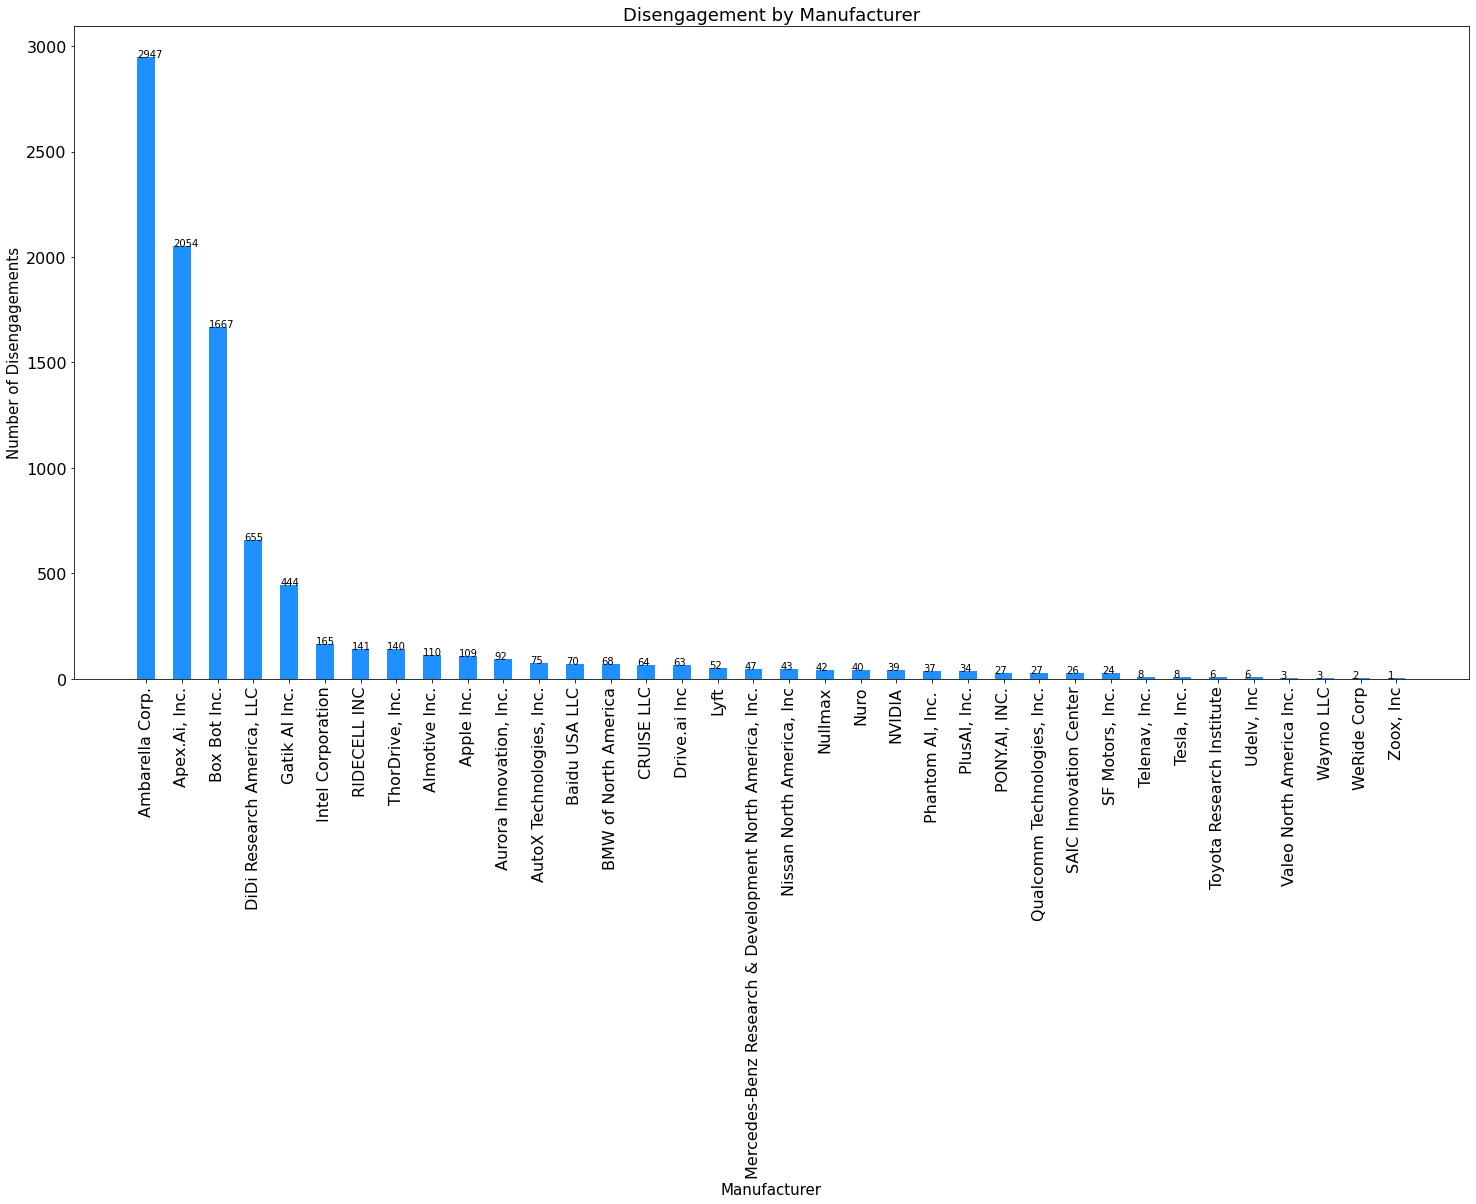

In [6]:
#Number of Disengagements categorized by Manufacturer
catmanu = df['Manufacturer'].unique().tolist()
plt.figure(figsize=(25,12))
plt.title('Disengagement by Manufacturer', fontsize=18) 
catmanunum = range(len(catmanu))
vcountmanu = df['Manufacturer'].value_counts().tolist()
plt.bar(catmanunum, vcountmanu, width = 0.5, color = ['#1E90FF'])
plt.xlabel('Manufacturer', fontsize=15)
plt.ylabel('Number of Disengagements',fontsize=15) 
ax = plt.subplot()
ax.set_xticks(catmanunum)
ax.set_xticklabels(catmanu, rotation = 90)
for i, v in enumerate(vcountmanu):
    ax.text(i-.25, v, str(v), color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


Driver Present During Disengagements

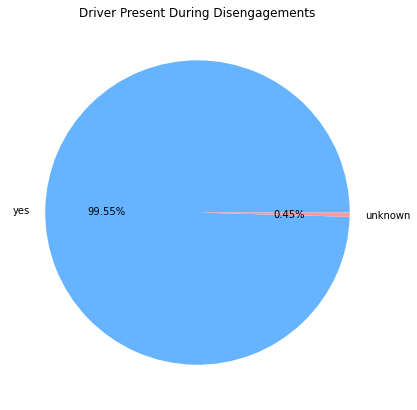

In [7]:
#Was Driver Present During the Disengagements
catdriver= df['Driver Present'].unique().tolist()
catdriver.pop()
catdriver.pop()
catdriver.append("unknown")
vcountdriver = df['Driver Present'].value_counts().tolist()
plt.figure(figsize = (12,7))
plt.title('Driver Present During Disengagements')
plt.pie(vcountdriver, labels= catdriver, autopct = '%0.2f%%', colors= colors)

plt.show()



Vehicle Capable Of Operating Without A Driver

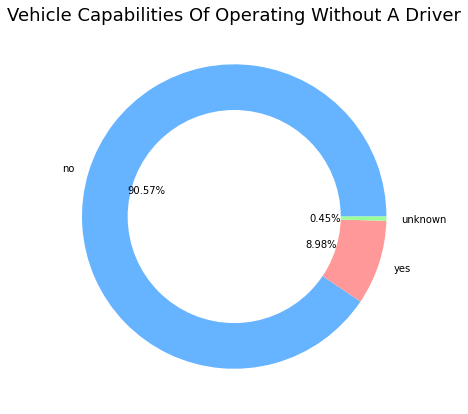

In [8]:
#Is Vehicle Capable of Operating Without A Driver 
catcap = df['Vehicle Is Capable Of Operating Without A Driver'].unique().tolist()
catcap.pop()
catcap.pop()
catcap.append('unknown')
colors2 = ['#00BFFF','#ff9999','#99ff99','#ffcc99']
vcountcap=df['Vehicle Is Capable Of Operating Without A Driver'].value_counts().tolist()
plt.figure(figsize=(12,7))
plt.title('Vehicle Capabilities Of Operating Without A Driver', fontsize=18)
plt.pie(vcountcap, labels= catcap, autopct = '%0.2f%%', colors= colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Disengagement Descriptions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


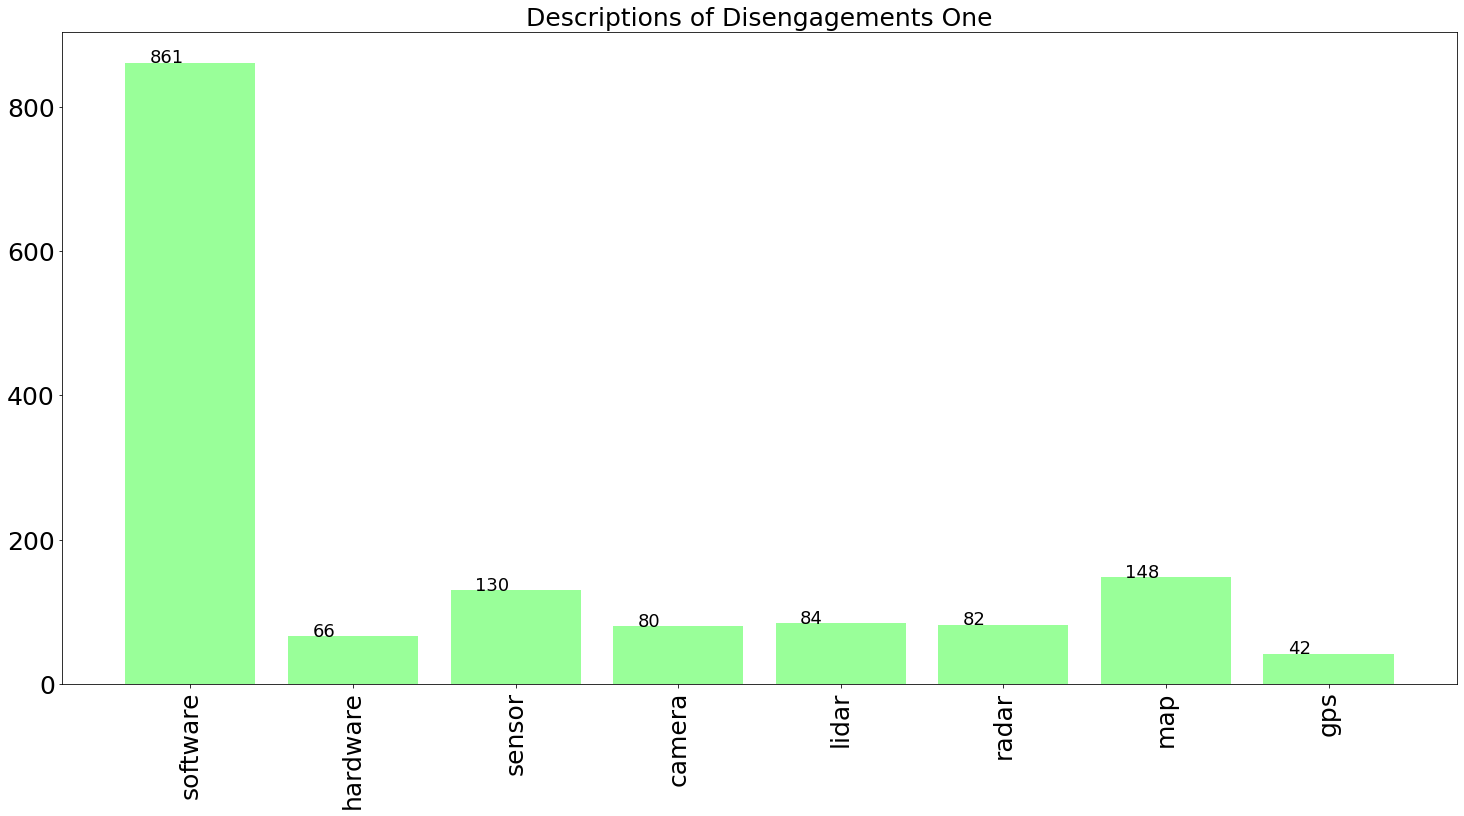

In [9]:
descriptions = df["Description Of Facts Causing Disengagement"].str.lower().str.replace('[^\w\s]','').replace('[^\n]',' ')
totalreports = float(len(df.index))
plt.figure(figsize = (25, 12))
c = dict()
for description in descriptions:
    description = description.split(" ")
    for word in np.unique(description):
        if word in c:
            c[word] += 1
        else:
            c[word] = 1
catdescrip1 = ["software","hardware","sensor","camera","lidar","radar","map","gps"]
catdescrip2= ["planning","perception","tracking","trajectory","localization","control"]
catdescrip3=["car","vehicle","truck","pedestrians","bicyclist"]
catdescrip4=["light","construction","traffic","intersection","weather","debris"]

leng1 = range(len(catdescrip1))
leng2 = range(len(catdescrip2))
leng3 = range(len(catdescrip3))
leng4 = range(len(catdescrip4))

software = c["software"]
hardware = c['hardware']
sensor = c['sensor']
camera = c['camera']
lidar = c['lidar'] 
radar = c['radar'] 
maap = c['map'] 
gps = c['gps']

planning = c["planning"]+c["planned"]
perception = c["perception"]
tracking = c["tracking"]
trajectory = c["trajectory"]
localization = c["localization"]
control =c["control"]+c["controller"]

car = c["car"]
vehicle = c["vehicle"]
truck = c["truck"]
pedestrians = c["pedestrians"]
bicyclist = c["bicyclist"]

light = c["green"]+c["light"]
construction = c["construction"]
traffic = c["traffic"]
intersection = c["intersection"]
weather = c["weather"] + c["rain"]
debris = c["debris"]

listvalue1 = [software, hardware, sensor, camera, lidar, radar, maap, gps]
listvalue2 = [planning, perception, tracking, trajectory, localization, control]
listvalue3 = [car, vehicle, truck, pedestrians, bicyclist]
listvalue4 = [light, construction, traffic, intersection, weather, debris]




plt.title("Descriptions of Disengagements One", fontsize = 25)
plt.bar(leng1, listvalue1, color = ['#99ff99'])
ax = plt.subplot()
ax.set_xticks(leng1)
ax.set_xticklabels(catdescrip1, rotation = 90, fontsize = 25)
for i, v in enumerate(listvalue1):
    ax.text(i-.25, v, str(v), color='black', fontsize = 18)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()





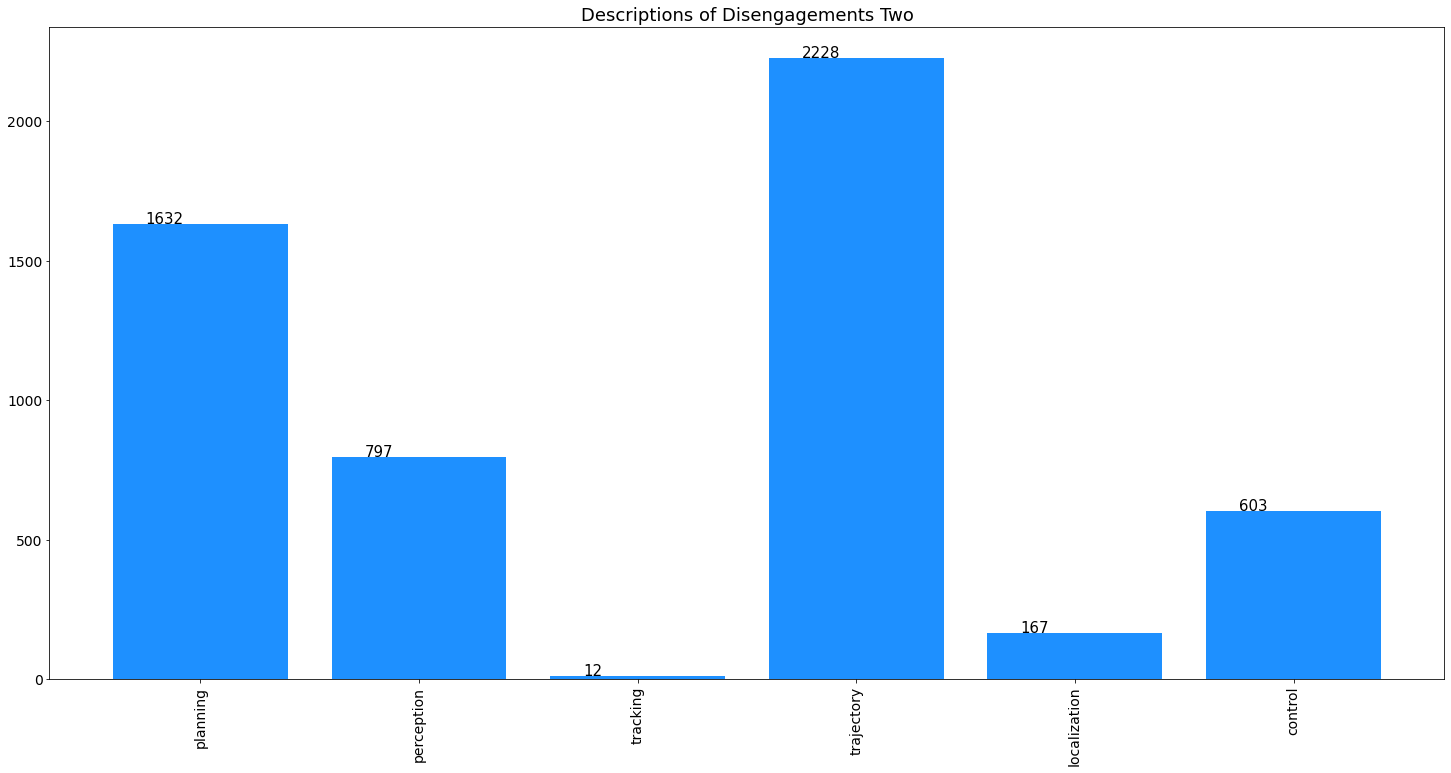

In [10]:
plt.figure(figsize = (25, 12))
plt.title("Descriptions of Disengagements Two", fontsize = 18)
plt.bar(leng2, listvalue2, color = ['#1E90FF'])
ax = plt.subplot()
ax.set_xticks(leng2)
ax.set_xticklabels(catdescrip2, rotation = 90, fontsize = 15)
for i, v in enumerate(listvalue2):
    ax.text(i-.25, v, str(v), color='black', fontsize = 15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()




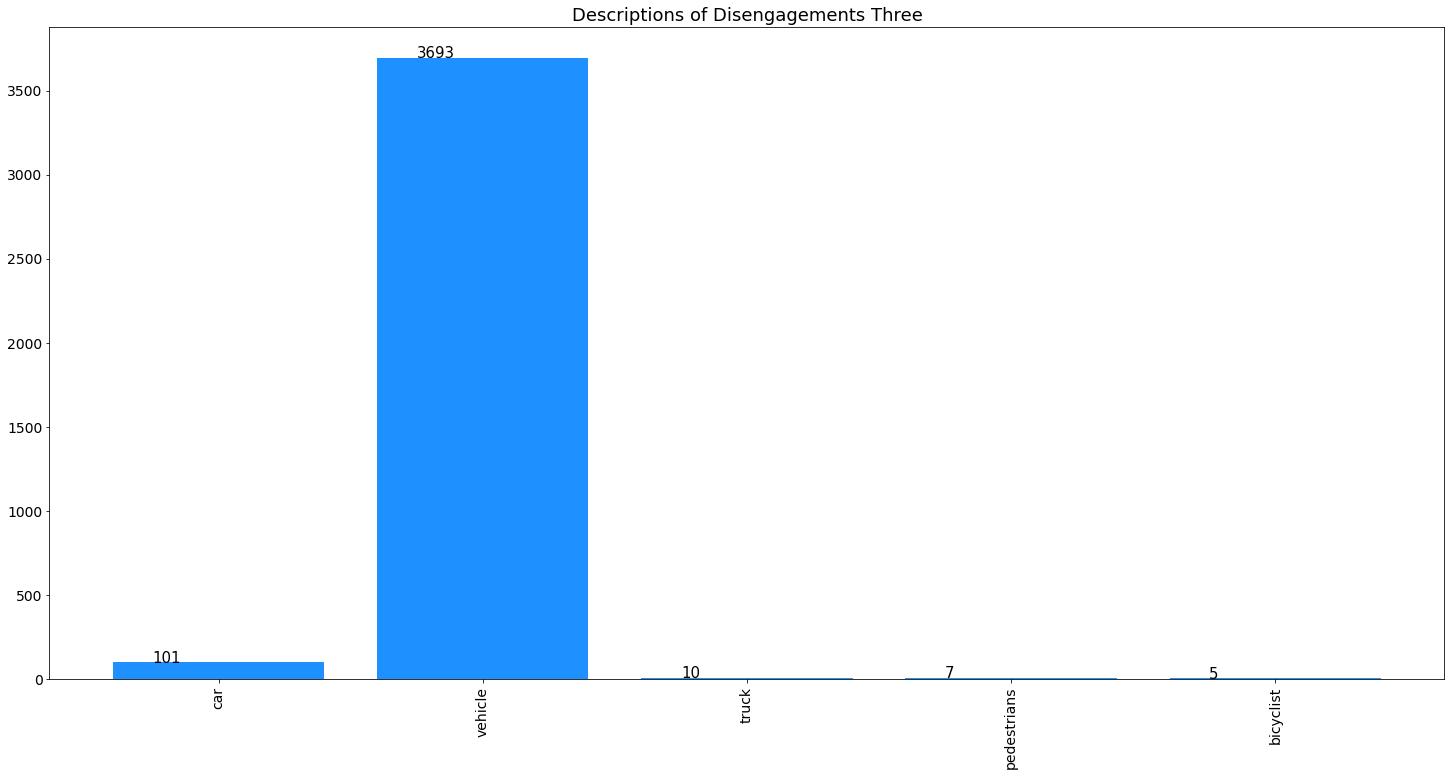

In [11]:
plt.figure(figsize = (25, 12))
plt.title("Descriptions of Disengagements Three", fontsize = 18)
plt.bar(leng3, listvalue3, color = ['#1E90FF'])
ax = plt.subplot()
ax.set_xticks(leng3)
ax.set_xticklabels(catdescrip3, rotation = 90, fontsize = 15)
for i, v in enumerate(listvalue3):
    ax.text(i-.25, v, str(v), color='black',fontsize = 15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()




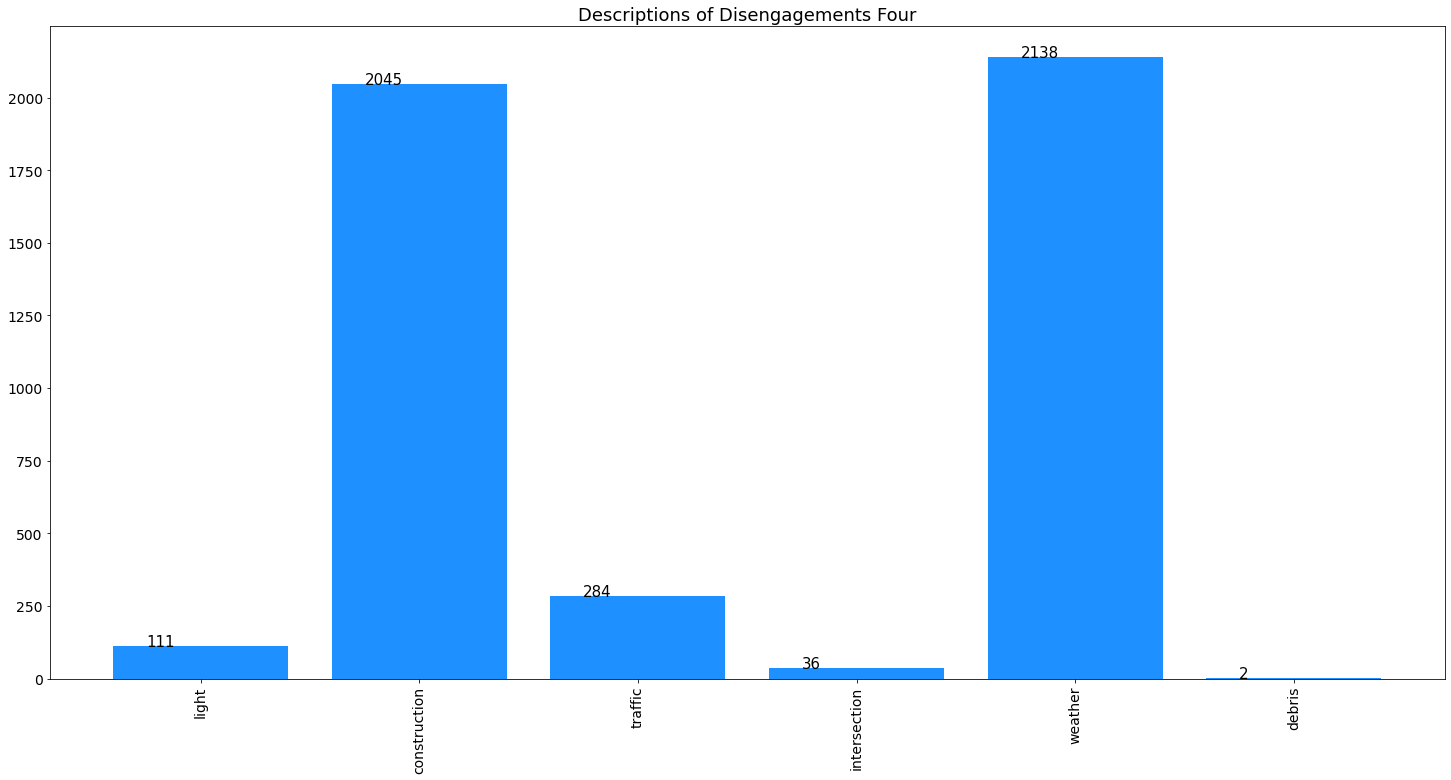

In [12]:
plt.figure(figsize = (25, 12))
plt.title("Descriptions of Disengagements Four", fontsize = 18)
plt.bar(leng4, listvalue4, color = ['#1E90FF'])
ax = plt.subplot()
ax.set_xticks(leng4)
ax.set_xticklabels(catdescrip4, rotation = 90, fontsize = 15)
for i, v in enumerate(listvalue4):
    ax.text(i-.25, v, str(v), color='black', fontsize = 15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


